### Concepts (Learning Objectives)

* Stationarity ↔️
* Test for stationarity (Dickey-Fuller Test)
* Statsmodels output

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import statsmodels
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa import stattools

from warnings import filterwarnings

In [2]:
df = pd.read_csv('flights_remainder.csv', index_col=0, parse_dates=True)

**Autoregressive Time Series**

$$y_{t+2} = w_1 y_{t+1} + w_2 y_{t} + e_{t+2} $$

### Time Series and Distribution Functions

Time series: Set of values for a variable that are sequenced in time. 

If there is no randomness and weak dependence in the process, the next data step can completely be determined using analytical solutions. 

But in most cases, there is some randomness or the underlying process is too complex to model analytically so you model it as a stochastic process and at every time step, the value of the random variable is chosen from a distribution.

### Stationarity

In order to model your time series, you want it to be stationary. This ensures that every value is drawn from the same distribution so its statistical properties don't change over time. 

* constant mean (df)

* constant variance (and covariance) (df)


For long term prediction, you would try to use patterns like trend and seasonality. For the short term prediction you need the stationarity, so that you can model the nearby points.

#### Types of stationarities we can encounter:


* Strict stationarity: Your time series is completely time invariant.

* Weak stationarity: The mean and variance do not change over time but auto-covariance depends on the time distance n between the steps t-n and t, rather than their absolute positions, so it can still be modelled as the same distribution.

* Trend stationary: It has a predictable trend. In this case, the overall mean trend equals the trend between consecutive steps.



**Question**

Are most time series in real life stationary? 

#### Example

In [3]:
def plotting_noise(x,y,label, text, position):
    plt.subplot(position)    
    plt.plot(x, y, color='k',linewidth = 0.5)
    plt.xlabel('t')
    plt.ylabel('value')
    plt.text(5.5, min(y)*0.95 ,text, fontsize = 13, color = 'red')


In [4]:
x = np.linspace(0, 10, 1000) 
gaussian_noise = np.random.normal(size=1000)

In [5]:
np.random.seed(510)
normal_y = np.random.normal(0,1,1000)
random_walk_y = np.cumsum(normal_y)

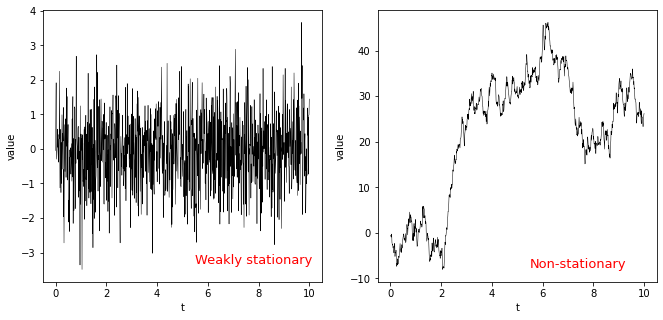

In [6]:
plt.figure(figsize=[11,5])
plotting_noise(x,gaussian_noise,'White noise','Weakly stationary',121)
plotting_noise(x,random_walk_y,'Random Walk','Non-stationary',122)
plt.savefig('whitenoise_randomwalk.png')

#### Unit Root

A non-stationary time-series might have a unit root which means the solution to the characteristic equation that relates to the differential has at least one root that is equal to 1 (could also be larger).

This results in an upredictable systematic pattern (as opposed to a stationary series we'd use to get some predictions from). For instance, if some extreme event happened and your equation has a root that is equal or larger than 1, the system is not able to just bounce back in next step as a stationary process should do, it will likely be affected by that event for many more steps after that as the underlying process is not dampening the effect. 

Think about finance, can you connect this to a stable and less-stable economy?

**For the basic concept** 
https://www.statisticshowto.com/unit-root/

**Read the introduction of the following article on Wikipedia to Unit Root**
https://en.wikipedia.org/wiki/Unit_root

**Nice simple solution example**
https://socialsciences.mcmaster.ca/magee/761_762/other%20material/unit%20and%20char%20roots.pdf

**If you are more into maths, go ahead and check how the characteristic equation is solved too**
https://en.wikipedia.org/wiki/Linear_difference_equation#Solution_of_homogeneous_case

#### Augmented Dickey-Fuller Test

Dickey - Fuller Test is a stationarity test for time series. It is measuring the likelihood of the solutions to the **differenced** form of the characteristic equation. Based on the significance level it associates with its statistical measure, you decide whether it's stationary or not.

https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/

https://www.statsmodels.org/0.6.1/generated/statsmodels.tsa.stattools.adfuller.html

The null hypothesis is that the time series is NOT-stationary. So small p value means that you have a stationary series.

(More about hypothesis testing: https://statisticsbyjim.com/hypothesis-testing/one-tailed-two-tailed-hypothesis-tests/)

In [7]:
statsmodels.tsa.stattools.adfuller(gaussian_noise)

(-21.20176773681201,
 0.0,
 1,
 998,
 {'1%': -3.4369193380671, '5%': -2.864440383452517, '10%': -2.56831430323573},
 2851.409632900028)

In [8]:
def print_adf(data):
    
    """ Prints the results of the augmented Dickey Fuller Test"""
    
    adf_stats, p, used_lag, n_obs, levels, information_criterion = \
            statsmodels.tsa.stattools.adfuller(data)
    
    print(f"""   
            adf: {round(adf_stats,2)}
            p: {p} 
            used lag: {used_lag} 
            number of observations: {n_obs}
            {round(levels['1%'],2)} (p=1; CI=99%) 
            {round(levels['5%'],2)} (p=5; CI=95%)
            {round(levels['10%'],2)} (p=10 CI=90%) 
            information criterion (AIC): {information_criterion}
            """)
   

In [9]:
print_adf(gaussian_noise)

   
            adf: -21.2
            p: 0.0 
            used lag: 1 
            number of observations: 998
            -3.44 (p=1; CI=99%) 
            -2.86 (p=5; CI=95%)
            -2.57 (p=10 CI=90%) 
            information criterion (AIC): 2851.409632900028
            


* The first number is the ADF-Stats, the more negative it is, the more confident we are that we don't have a random walk.

* In the lookup table (dictionary), the smallest value is -3.44 for the adf_stats. Hence from -32.75 < -3.4 we can reject the null hypothesis with a confidence level of more than 99% (p=0.01, highly significant result).


Think about the possible values of the ADF-Stats to be a random variable. It has the assumption that a time series is not stationary. So if the value you get from the test is in the centre of the distribution that describes the ADF-Stats variable, then your time series is NOT stationary. Therefore, we would want our remainder's ADF-Stats value to be somewhere outside. If you choose a confidence interval of 95%, you are saying you covered 95% of ADF outcomes inside the range and any value outside of that is quite significantly different (meaning it's stationary). 

If you chose 95%, then your **p-value is 0.05.** 


### Reading The Output Of The Statsmodels AutoReg

In [10]:
def output(n):
    ar_model = AutoReg(endog=df['remainder'], lags = n).fit()
    return ar_model.summary()


In [11]:
output(1)

/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              remainder   No. Observations:                  132
Model:                     AutoReg(1)   Log Likelihood                -453.876
Method:               Conditional MLE   S.D. of innovations              7.735
Date:                Thu, 24 Feb 2022   AIC                              4.137
Time:                        11:31:26   BIC                              4.203
Sample:                    02-01-1949   HQIC                             4.164
                         - 12-01-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -0.0882      0.676     -0.130      0.896      -1.413       1.236
remainder.L1     0.7597      0.057     13.310      0.000       0.648       0.872
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3164           +0.0000j            1.3164            0.0000
-----------------------------------------------------------------------------
"""

In [15]:
output(4)

/Users/carlospumar/opt/anaconda3/envs/TS_Stats/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              remainder   No. Observations:                  132
Model:                     AutoReg(4)   Log Likelihood                -440.422
Method:               Conditional MLE   S.D. of innovations              7.552
Date:                Thu, 24 Feb 2022   AIC                            892.845
Time:                        09:09:04   BIC                            909.957
Sample:                    05-01-1949   HQIC                           899.798
                         - 12-01-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1486      0.668     -0.222      0.824      -1.458       1.161
remainder.L1     0.7265      0.088      8.221      0.000       0.553       0.900
remainder.L2     0.1887      0.108      1.747      0.081      -0.023       0.400
remainder.L3    -0.1654      0.106     -1.554      0.120      -0.374       0.043
remainder.L4    -0.0256      0.087     -0.293      0.769      -0.197       0.145
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4385           -0.4457j            1.5059           -0.0478
AR.2            1.4385           +0.4457j            1.5059            0.0478
AR.3           -2.5297           -0.0000j            2.5297           -0.5000
AR.4           -6.8124           -0.0000j            6.8124           -0.5000
-----------------------------------------------------------------------------
"""

$$y_{t+1} = coef_1 * y_t + intercept$$

- Likelihood is a measure of the goodness of fit for your model to the data (similar to probability but not exactly and it is not bound by the 1 at the upper limit). "How likely it is that your data coming from this process?" Why is the log likelihood negative? 

https://stats.stackexchange.com/questions/132877/how-to-calculate-the-likelihood-function

- P value is a measure of the probability of the observed value occuring randomly (the hypothesis that you are trying to reject). A small p value means that the value is not likely to have occured randomly, and hence is significant. The p value cut-off of 0.05 (5%) is typical. In the above the high P value for the intercept suggests that we should probably try to improve the model. Or rather the intercept value we find isn't necessarily going to help our model. 

https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/

- The values [0.025	0.975] correspond to the 95% confidence intervals for both parameter values (intercept and slope). So 95% of possible values for the two coefficients are between these ranges.

- In time series, the innovation is the difference between the observed value and the forecast based on the past. (S.D: standard deviation). So if you think in terms of the standard deviation, 7.7 actually seems like a small value.

- AIC is the Akaike Information Criterion. We want to minimise it and this will happen for the smaller number of parameters and larger likelihood. 
     
     $$AIC = 2k - 2log(L)$$

- BIC is the Bayesian Information Criterion. It is very similar to AIC, but the penalty term for parameters is larger (logarithm of the number of observations used).

     $$BIC = k ln(n) - 2log(L)$$


- Root is the solution of the characteristic equation. They are the inverse roots of the AR polynomial above, either the roots of the characteristic equation need to be smaller than 1 or the roots of the polynomial needs to be larger than 1 for stationarity in an AR process.

https://socialsciences.mcmaster.ca/magee/761_762/other%20material/unit%20and%20char%20roots.pdf

https://uh.edu/~bsorense/arma-intro2012.pdf

http://www2.stat.duke.edu/~cr173/Sta444_Fa18/slides/Lec08/Lec08.pdf

https://stats.stackexchange.com/questions/456191/how-ar-model-parameters-are-estimated

**Is the remainder stationary?**

<AxesSubplot:xlabel='date'>

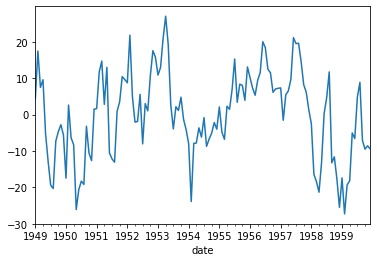

In [16]:
df.remainder.plot()

In [17]:
print_adf(df.remainder)

   
            adf: -2.68
            p: 0.07845995899280372 
            used lag: 13 
            number of observations: 118
            -3.49 (p=1; CI=99%) 
            -2.89 (p=5; CI=95%)
            -2.58 (p=10 CI=90%) 
            information criterion (AIC): 814.1283155536887
            


#### References:

https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1